<a href="https://colab.research.google.com/github/MorojMunshi/Lab/blob/main/MRI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import io
import glob
import math
from PIL import Image
import cv2
from numpy.random import randint
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
import numpy as np

In [11]:
df= pd.read_parquet('/content/Train.parquet')
df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


In [12]:
def load_image_as_np_array(image_bytes):
    try:
        np_array = np.frombuffer(image_bytes, np.uint8)
        image = cv2.imdecode(np_array, cv2.IMREAD_COLOR)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            return image
        else:
            print("Error: Unable to decode image.")
            return None
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

In [13]:
x = []
y = []
for i in range(len(df)):
    row = df.iloc[i]
    image_info = row['image']
    image_bytes = image_info['bytes']
    image_path = image_info['path']
    image_label = row['label']
    image_np_array = load_image_as_np_array(image_bytes)
    if image_np_array is not None:
        if len(image_np_array.shape) == 3:
            x.append(image_np_array)
            y.append(image_label)
        else:
            print(f"Ignoring image with unexpected shape: {image_np_array.shape}")

In [14]:
x[0].shape


(128, 128, 3)

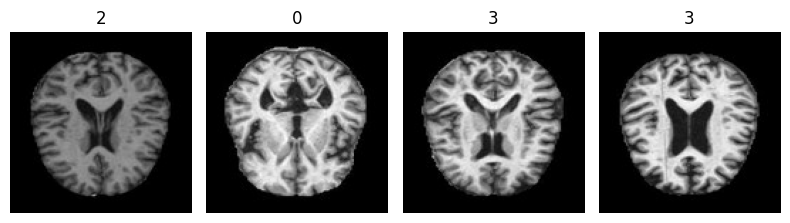

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(8, 3))

for i in range(4):
    ax = axes[i]
    ax.imshow(x[i], cmap='viridis')
    ax.set_title(y[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.10,random_state=51,shuffle=True)

In [17]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [18]:
#data normalization

x_train=x_train/255.0
x_test=x_test/255.0

In [19]:
model=keras.models.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3), input_shape=(128,128,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.05),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(512,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.05),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.01),
    keras.layers.Dense(4,activation='softmax'),
])


In [20]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │              

 Total params: 1,843,844 (7.03 MB)

 Trainable params: 1,841,604 (7.03 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [22]:
class new_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.9855:
            self.model.stop_training = True

stop_epoch= new_callback()

In [23]:
warnings.filterwarnings('ignore')
model_hist=model.fit(x_train,y_train,epochs=1, batch_size=32, callbacks=[stop_epoch], validation_split=.05)

137/137 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.5204 - loss: 1.0755 - val_accuracy: 0.5498 - val_loss: 1.1466


In [24]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 461ms/step


In [25]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 488ms/step


In [26]:
mapping_dict={
    0: 'Mild_Sick',
    1: 'Moderate_Sick',
    2: 'Non_Sick',
    3: 'Very_Sick'
}
class_names= list(mapping_dict.values())
print(classification_report(y_test,y_pred, target_names=class_names))

               precision    recall  f1-score   support

    Mild_Sick       0.00      0.00      0.00        70
Moderate_Sick       0.00      0.00      0.00         2
     Non_Sick       0.53      0.99      0.69       265
    Very_Sick       0.69      0.05      0.10       175

     accuracy                           0.53       512
    macro avg       0.30      0.26      0.20       512
 weighted avg       0.51      0.53      0.39       512



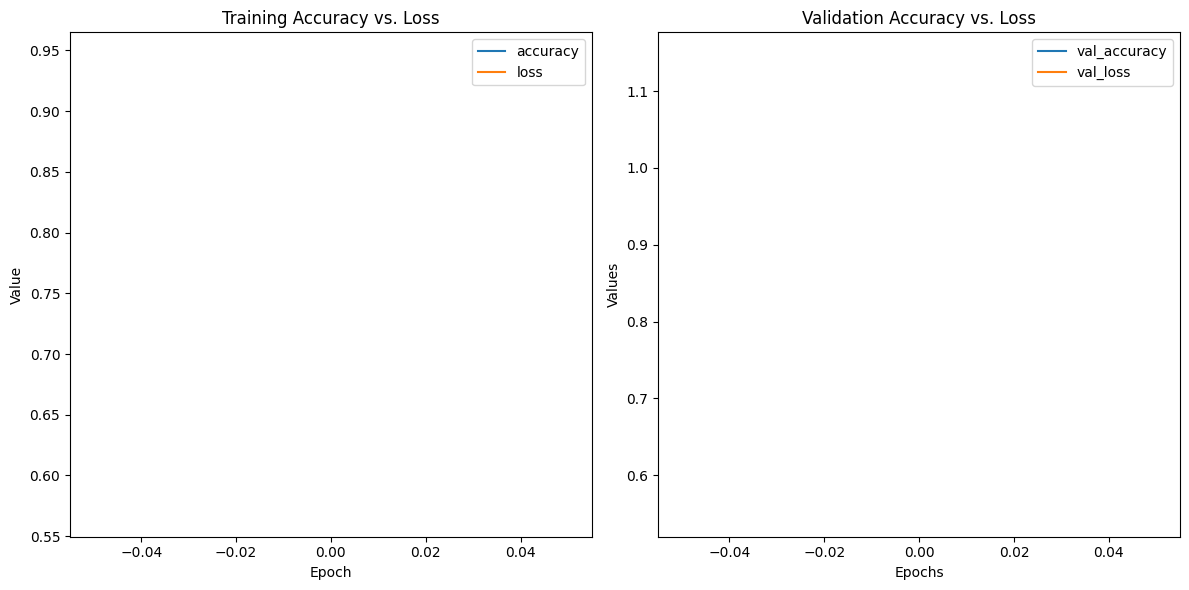

In [27]:
#pd.DataFrame(model_hist.history).plot()
history_df = pd.DataFrame(model_hist.history)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
history_df[['accuracy', 'loss']].plot(ax=ax1)
ax1.set_title('Training Accuracy vs. Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Value')
history_df[['val_accuracy', 'val_loss']].plot(ax=ax2)
ax2.set_title('Validation Accuracy vs. Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Values')
plt.tight_layout()
plt.show()

In [28]:
test_df=pd.read_parquet('Test.parquet')
test_df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


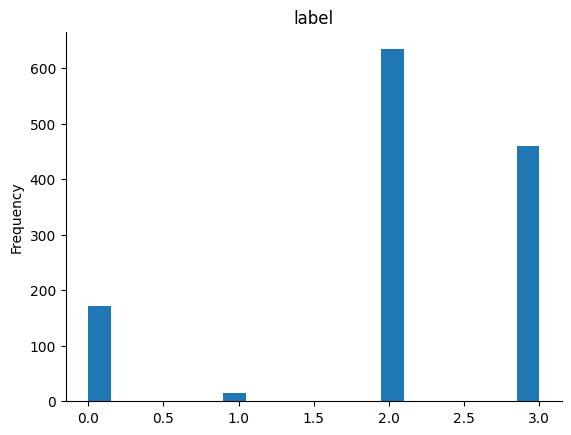

In [29]:
# @title label

from matplotlib import pyplot as plt
test_df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
test_x=[]
test_y=[]
for i in range(len(test_df)):
    row = test_df.iloc[i]
    image_info = row['image']
    image_bytes = image_info['bytes']
    image_path = image_info['path']
    image_label=row['label']
    image_np_array = load_image_as_np_array(image_bytes)
    if image_np_array is not None:
        if len(image_np_array.shape) == 3:
            test_x.append(image_np_array)
            test_y.append(image_label)
        else:
            print(f"Ignoring image with unexpected shape: {image_np_array.shape}")

In [31]:
test_x=np.array(test_x)
test_x=test_x/255.0
test_y=np.array(test_y)

In [32]:
#before apply 10 accuracy 49%

In [33]:
l, a = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy: {a*100}%')

Accuracy: 50.93749761581421%


In [34]:
#after
l, a = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy: {a*100}%')

Accuracy: 50.93749761581421%


In [35]:
test_y_pred=model.predict(test_x)
test_y_pred=np.argmax(test_y_pred, axis=1)
test_y_pred[:5]

40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 434ms/step


array([2, 2, 2, 2, 2])

In [36]:
print(classification_report(test_y,test_y_pred,target_names=class_names))

               precision    recall  f1-score   support

    Mild_Sick       0.00      0.00      0.00       172
Moderate_Sick       0.00      0.00      0.00        15
     Non_Sick       0.51      1.00      0.67       634
    Very_Sick       0.70      0.04      0.08       459

     accuracy                           0.51      1280
    macro avg       0.30      0.26      0.19      1280
 weighted avg       0.50      0.51      0.36      1280



In [37]:
test_y = np.vectorize(mapping_dict.get)(test_y)
test_y_pred = np.vectorize(mapping_dict.get)(test_y_pred)

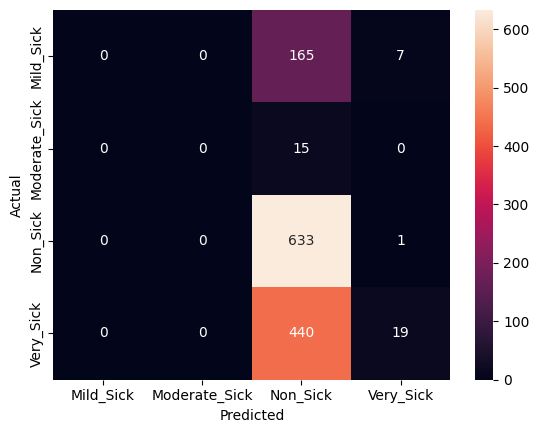

In [38]:
cm=confusion_matrix(test_y,test_y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

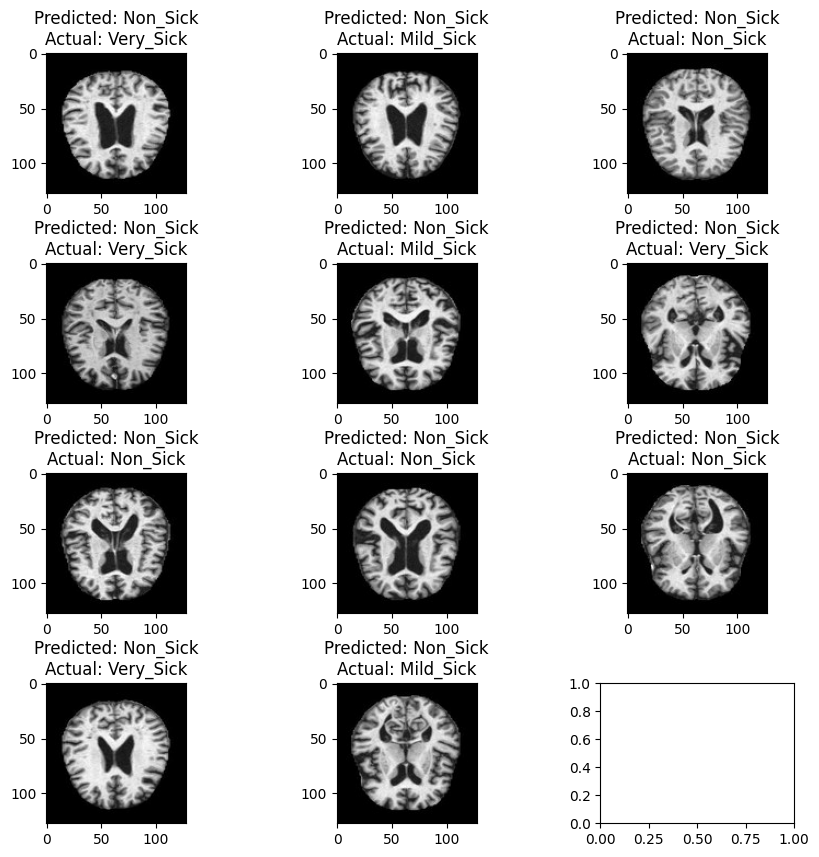

In [39]:
%matplotlib inline

num_images = randint(6, 12)
rows = math.ceil(math.sqrt(num_images))
cols = math.ceil(num_images / rows)

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(num_images):
    row = i // cols
    col = i % cols
    ax = axes[row, col] if num_images > 1 else axes
    ax.imshow(test_x[i], cmap='viridis')
    ax.set_title(f"Predicted: {test_y_pred[i]}\nActual: {test_y[i]}")

In [40]:
ax.axis('off')

# Hide any unused subplots
for i in range(num_images, rows * cols):
    if num_images > 1:
        fig.delaxes(axes.flatten()[i])
    else:
        fig.delaxes(axes)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [50]:
# prompt: I want apply image and make predicion

import numpy as np
# Load the image
image_path = '/content/IMG_4896.jpeg'
image_np_array = load_image_as_np_array(open(image_path, 'rb').read())

# Preprocess the image
image_np_array = cv2.resize(image_np_array, (128, 128))
image_np_array = image_np_array / 255.0

# Make a prediction
prediction = model.predict(np.expand_dims(image_np_array, axis=0))

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]

# Print the prediction
print(f"Predicted class: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: Very_Sick


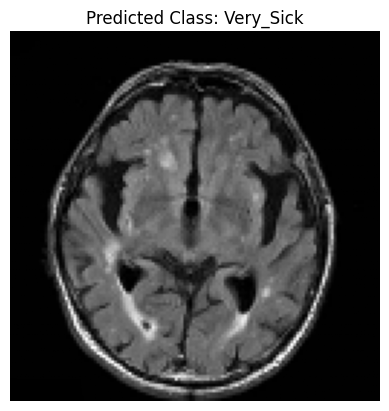

               precision    recall  f1-score   support

    Mild_Sick       0.00      0.00      0.00       172
Moderate_Sick       0.00      0.00      0.00        15
     Non_Sick       0.51      1.00      0.67       634
    Very_Sick       0.70      0.04      0.08       459

     accuracy                           0.51      1280
    macro avg       0.30      0.26      0.19      1280
 weighted avg       0.50      0.51      0.36      1280



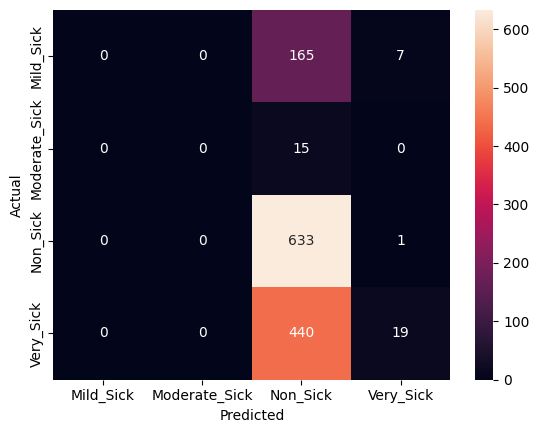

In [51]:
# prompt: show the imahe and analysis in graph

import matplotlib.pyplot as plt
# Display the image
plt.imshow(image_np_array, cmap='viridis')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()

# Print the classification report
print(classification_report(test_y, test_y_pred, target_names=class_names))

# Show the confusion matrix
cm = confusion_matrix(test_y, test_y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: Very_Sick


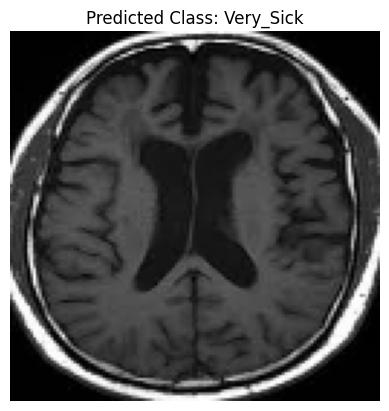

In [52]:
# prompt: I want apply CNN model and make prediction

import matplotlib.pyplot as plt
import numpy as np
# Load the image
image_path = '/content/IMG_4899.jpeg'
image_np_array = load_image_as_np_array(open(image_path, 'rb').read())

# Preprocess the image
image_np_array = cv2.resize(image_np_array, (128, 128))
image_np_array = image_np_array / 255.0

# Make a prediction
prediction = model.predict(np.expand_dims(image_np_array, axis=0))

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]

# Print the prediction
print(f"Predicted class: {predicted_class_name}")


# Display the image
plt.imshow(image_np_array, cmap='viridis')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.4895 - loss: 1.1115 - val_accuracy: 0.6052 - val_loss: 0.8783
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.5641 - loss: 0.9137 - val_accuracy: 0.6291 - val_loss: 0.7693
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.6935 - loss: 0.7144 - val_accuracy: 0.7484 - val_loss: 0.6177
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7982 - loss: 0.4760 - val_accuracy: 0.8460 - val_loss: 0.3729
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8890 - loss: 0.2876 - val_accuracy: 0.8720 - val_loss: 0.3233
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9542 - loss: 0.1335 - val_accuracy: 0.9024 - val_loss: 0.2968
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9695 - loss: 0.0887 - val_accuracy: 0.8959 - val_loss: 0.3268
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9777 - loss: 0.0640 - val_accu

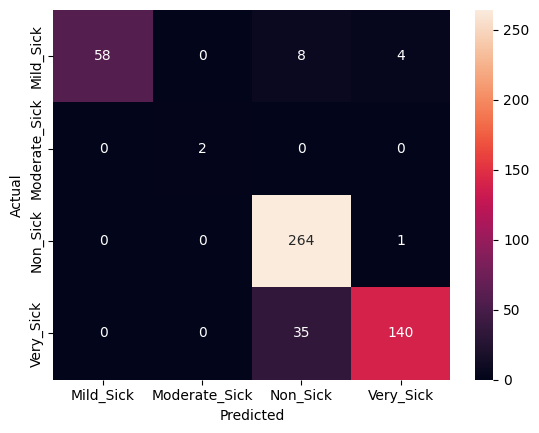

In [53]:
# prompt: I want apply CNN model on this dataset

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Predict the labels of the test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred))

# Show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# نموذج VGG (مثل VGG16) من مكتبة Keras

In [54]:
# Ensure TensorFlow is installed (only needed if not using Colab)
!pip install tensorflow

# Import necessary libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)  # Modify based on the number of classes

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 71, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 100, in _build_session
    session = 

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 3,211,650 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [55]:
print(f"test_x dtype: {test_x.dtype}, shape: {test_x.shape}")
print(f"test_y dtype: {test_y.dtype}, shape: {test_y.shape}")

test_x dtype: float64, shape: (1280, 128, 128, 3)
test_y dtype: <U13, shape: (1280,)


In [56]:
from sklearn.preprocessing import LabelEncoder

# إنشاء كائن LabelEncoder
label_encoder = LabelEncoder()

# تحويل القيم النصية إلى أرقام
test_y = label_encoder.fit_transform(test_y)

# عرض التصنيفات المشفرة
print("Encoded Classes:", label_encoder.classes_)

Encoded Classes: ['Mild_Sick' 'Moderate_Sick' 'Non_Sick' 'Very_Sick']


In [57]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# التأكد من استدعاء مكتبة pandas مع الاسم المستعار pd
import pandas as pd

# ... (الكود السابق) ...

# تحميل بيانات الصور والتسميات من ملفات Parquet
df_train = pd.read_parquet('/content/Train.parquet')
df_val = pd.read_parquet('/content/Test.parquet')

# ... (بقية الكود) ...

In [58]:
# ... previous code ...

# التأكد من استدعاء مكتبة pandas مع الاسم المستعار pd
import pandas as pd

# ... (الكود السابق) ...

# تحميل بيانات الصور والتسميات من ملفات Parquet
df_train = pd.read_parquet('/content/Train.parquet')
df_val = pd.read_parquet('/content/Test.parquet')

# Define the mapping_dict here, before it's used:
mapping_dict={
    0: 'Mild_Sick',
    1: 'Moderate_Sick',
    2: 'Non_Sick',
    3: 'Very_Sick'
}

# Now you can use mapping_dict:
df_train['label'] = df_train['label'].map(mapping_dict)
df_val['label'] = df_val['label'].map(mapping_dict)

In [59]:
df_train['image_path'] = '/content/IMG_4740.jpeg'
df_val['image_path'] = '/content/IMG_4740.jpeg'

In [60]:
# Assume your image paths are stored in the 'path' key under the 'image' column
df_train['image_path'] = df_train['image'].apply(lambda x: x['path'])
df_val['image_path'] = df_val['image'].apply(lambda x: x['path'])

In [61]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np

# تحميل بيانات الصور والتسميات من ملفات Parquet
df_train = pd.read_parquet('/content/Train.parquet')
df_val = pd.read_parquet('/content/Test.parquet')

# Define the mapping_dict here, before it's used:
mapping_dict={
    0: 'Mild_Sick',
    1: 'Moderate_Sick',
    2: 'Non_Sick',
    3: 'Very_Sick'
}

# Now you can use mapping_dict:
df_train['label'] = df_train['label'].map(mapping_dict)
df_val['label'] = df_val['label'].map(mapping_dict)

# Assume your image paths are stored in the 'path' key under the 'image' column
#df_train['image_path'] = df_train['image'].apply(lambda x: x['path'])
#df_val['image_path'] = df_val['image'].apply(lambda x: x['path'])


# Function to load image from bytes
def load_image_from_bytes(image_bytes):
    image = tf.image.decode_jpeg(image_bytes, channels=3)  # Assuming JPEG format
    image = tf.image.resize(image, [150, 150])  # Resize to match VGG16 input
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image

# Prepare data for ImageDataGenerator
train_images = [load_image_from_bytes(row['image']['bytes']) for _, row in df_train.iterrows()]
train_labels = pd.get_dummies(df_train['label']).values # One-hot encode labels

val_images = [load_image_from_bytes(row['image']['bytes']) for _, row in df_val.iterrows()]
val_labels = pd.get_dummies(df_val['label']).values # One-hot encode labels

train_images = np.array(train_images)
val_images = np.array(val_images)


# إعداد ImageDataGenerator للبيانات التدريبية والاختبارية
train_datagen = ImageDataGenerator(
    # ... (any augmentations you want to apply)
)
validation_datagen = ImageDataGenerator(
    # ... (any augmentations you want to apply)
)

# Use flow() method instead of flow_from_directory()
train_generator = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=32,
    shuffle=True,
    # ... (other parameters)
)

validation_generator = validation_datagen.flow(
    x=val_images,
    y=val_labels,
    batch_size=32,
    shuffle=False, # Don't shuffle validation data
    # ... (other parameters)
)

# ... (rest of your code to build and train the model)

In [62]:
# بناء نموذج VGG16 مع الطبقات المسبقة التدريب
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# تجميد الطبقات السابقة
base_model.trainable = False

# إضافة طبقات جديدة للنموذج
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(4, activation='softmax')  # Changed to 4 neurons and softmax activation
])

# تجميع النموذج
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Changed loss to categorical_crossentropy

# تحقق من محتويات المولدات
print(f'Train Generator: {len(train_generator)} batches')
print(f'Validation Generator: {len(validation_generator)} batches')

# تدريب النموذج
history = model.fit(
    train_generator,
    epochs=8,
    validation_data=validation_generator
)

Train Generator: 160 batches
Validation Generator: 40 batches
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 1663s 10s/step - accuracy: 0.5296 - loss: 1.1416 - val_accuracy: 0.6758 - val_loss: 0.7660
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 1689s 10s/step - accuracy: 0.6731 - loss: 0.7599 - val_accuracy: 0.6820 - val_loss: 0.7279
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 1713s 10s/step - accuracy: 0.7186 - loss: 0.6588 - val_accuracy: 0.6602 - val_loss: 0.7658
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 1706s 10s/step - accuracy: 0.7792 - loss: 0.5329 - val_accuracy: 0.7688 - val_loss: 0.5770
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 1663s 10s/step - accuracy: 0.8057 - loss: 0.4586 - val_accuracy: 0.6812 - val_loss: 0.7409
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 1700s 10s/step - accuracy: 0.8103 - loss: 0.4547 - val_accuracy: 0.7984 - val_loss: 0.5051
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 1662s 10s/step - accuracy: 0.8704 - loss: 0.3476 - val_accuracy: 0.8086 - val_loss: 0.4593
Epoch 8/8
160/160 ━━━━━━━━━━

In [63]:
# حفظ النموذج بعد التدريب
model.save('vgg16_model.h5')

# عرض ملخص النموذج
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,009,998 (80.15 MB)

 Trainable params: 2,098,436 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,196,874 (16.01 MB)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. تحميل بيانات الاختبار
# تأكد من أن بيانات الاختبار معالجة بنفس طريقة بيانات التدريب
test_images, test_labels =  # بيانات الصور والملصقات (Ground Truth)

# 2. الحصول على التنبؤات من النموذج
predictions = model.predict(test_images)  # استبدل model بالنموذج الخاص بك
predicted_classes = predictions.argmax(axis=1)  # إذا كان لديك تصنيف متعدد (softmax)

# 3. حساب الدقة
true_classes = test_labels.argmax(axis=1)  # إذا كانت labels على شكل one-hot
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 4. إنشاء مصفوفة الالتباس
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# 5. رسم مصفوفة الالتباس
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Alzheimer', 'Alzheimer'], yticklabels=['No Alzheimer', 'Alzheimer'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 6. تقرير التصنيف
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Alzheimer', 'Alzheimer']))

In [67]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. تحميل النموذج المدرب مسبقًا
model = tf.keras.models.load_model('/content/vgg16_model.h5')  # ضع مسار النموذج هنا

# 2. تحميل بيانات الاختبار
# استخدم الدالة `image_dataset_from_directory` لتحميل بيانات الاختبار إذا كانت الصور مخزنة في مجلدات
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Test.parquet',  # مسار بيانات الاختبار
    image_size=(224, 224),   # حجم الصور المناسب للنموذج
    batch_size=32,           # حجم الدفعات
    shuffle=False            # لا تقم بإعادة ترتيب الصور للحفاظ على التسلسل
)

# الحصول على الصور والفئات الحقيقية
test_images = []
test_labels = []

for images, labels in test_dataset:
    test_images.append(images)
    test_labels.append(labels)

# تحويل الصور والفئات إلى مصفوفات
test_images = tf.concat(test_images, axis=0)
test_labels = tf.concat(test_labels, axis=0)

# 3. الحصول على التنبؤات من النموذج
predictions = model.predict(test_images)  # الحصول على احتمالات الفئات
predicted_classes = np.argmax(predictions, axis=1)  # تحويل الاحتمالات إلى فئات

# 4. استخراج الفئات الحقيقية
true_classes = test_labels.numpy()  # تحويل التسمية إلى أرقام

# 5. حساب الدقة
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 6. إنشاء مصفوفة الالتباس
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# 7. رسم مصفوفة الالتباس
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_names, yticklabels=test_dataset.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 8. عرض تقرير التصنيف
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=test_dataset.class_names))

NotFoundError: Could not find directory /content/Test.parquet

40/40 ━━━━━━━━━━━━━━━━━━━━ 353s 9s/step
Test Accuracy: 83.98%
Confusion Matrix:
[[150   0   3  19]
 [  0  13   0   2]
 [ 33   0 531  70]
 [ 26   0  52 381]]


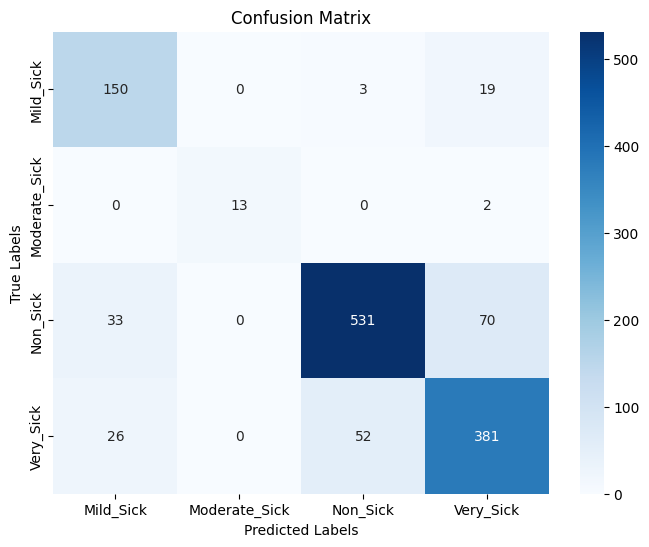

Classification Report:
               precision    recall  f1-score   support

    Mild_Sick       0.72      0.87      0.79       172
Moderate_Sick       1.00      0.87      0.93        15
     Non_Sick       0.91      0.84      0.87       634
    Very_Sick       0.81      0.83      0.82       459

     accuracy                           0.84      1280
    macro avg       0.86      0.85      0.85      1280
 weighted avg       0.85      0.84      0.84      1280



In [68]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Load the saved model
model = tf.keras.models.load_model('/content/vgg16_model.h5')

# 2. Load test data (you already have this in df_val)
df_val = pd.read_parquet('/content/Test.parquet')

# Define the mapping_dict here, before it's used:
mapping_dict={
    0: 'Mild_Sick',
    1: 'Moderate_Sick',
    2: 'Non_Sick',
    3: 'Very_Sick'
}

# Now you can use mapping_dict:
df_val['label'] = df_val['label'].map(mapping_dict)

# Function to load image from bytes
def load_image_from_bytes(image_bytes):
    image = tf.image.decode_jpeg(image_bytes, channels=3)
    image = tf.image.resize(image, [150, 150])  # Resize to match VGG16 input
    image = tf.cast(image, tf.float32) / 255.0
    return image

# Prepare test data
test_images = [load_image_from_bytes(row['image']['bytes']) for _, row in df_val.iterrows()]
test_labels = pd.get_dummies(df_val['label']).values  # One-hot encode labels

test_images = np.array(test_images)

# 3. Get predictions from the model
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# 4. Extract true classes
true_classes = np.argmax(test_labels, axis=1)  # Get true class indices from one-hot encoded labels

# 5. Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 6. Create confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# 7. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(mapping_dict.values()),  # Use class names from mapping_dict
            yticklabels=list(mapping_dict.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 8. Display classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(mapping_dict.values())))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
Predicted class: Very_Sick
Confidence: 100.00%


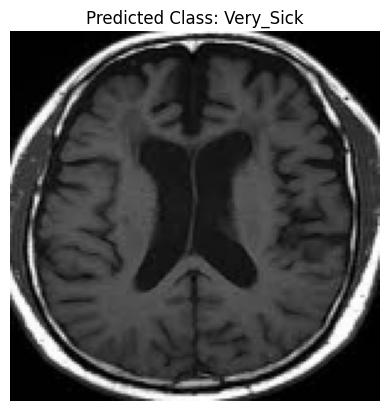

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('vgg16_model.h5')  # ضع مسار النموذج هنا

# Define class names (adjust according to your training data)
class_names = ['No Alzheimer', 'Alzheimer']  # عدل أسماء الفئات حسب بياناتك

# Load the image
image_path = '/content/IMG_4899.jpeg'  # ضع مسار الصورة هنا
image_np_array = cv2.imread(image_path)  # قراءة الصورة
image_np_array = cv2.cvtColor(image_np_array, cv2.COLOR_BGR2RGB)  # تحويل الصورة إلى RGB

# Preprocess the image
image_np_array = cv2.resize(image_np_array, (150, 150))  # تغيير الحجم ليتناسب مع مدخلات النموذج
image_np_array = image_np_array / 255.0  # تطبيع القيم بين 0 و 1

# Make a prediction
prediction = model.predict(np.expand_dims(image_np_array, axis=0))  # أضف بعدًا إضافيًا ليتناسب مع مدخلات النموذج

# Get the predicted class label
class_names = ['Mild_Sick', 'Moderate_Sick', 'Non_Sick', 'Very_Sick']
predicted_class_index = np.argmax(prediction)  # استخراج الفئة ذات الاحتمالية الأعلى
predicted_class_name = class_names[predicted_class_index]  # الحصول على اسم الفئة

# Print the prediction
print(f"Predicted class: {predicted_class_name}")
print(f"Confidence: {prediction[0][predicted_class_index] * 100:.2f}%")

# Display the image
plt.imshow(image_np_array)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()